In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('Match_History_Details.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.head()

,GameId,Duration,Team1_Barons,Team1_Dragons,Team2_Barons,Team2_Dragons,Team1_Player1_Champion,Team1_Player2_Champion,Team1_Player3_Champion,Team1_Player4_Champion,...,Team1_Player1_Lane,Team1_Player2_Lane,Team1_Player3_Lane,Team1_Player4_Lane,Team1_Player5_Lane,Team2_Player1_Lane,Team2_Player2_Lane,Team2_Player3_Lane,Team2_Player4_Lane,Team2_Player5_Lane
0,3084513429,1540,0,0,1,2,86,37,268,81,...,TOP,BOTTOM,MIDDLE,BOTTOM,JUNGLE,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM
1,3084446759,1642,0,4,1,0,99,29,23,113,...,BOTTOM,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,JUNGLE,JUNGLE,MIDDLE,BOTTOM
2,3084435694,1046,0,0,0,2,30,134,236,80,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,3083216368,1614,0,1,1,3,92,4,9,246,...,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM,BOTTOM,JUNGLE,MIDDLE,BOTTOM,TOP
4,3083201609,1444,1,2,0,0,15,350,113,61,...,BOTTOM,BOTTOM,JUNGLE,MIDDLE,TOP,JUNGLE,BOTTOM,TOP,MIDDLE,BOTTOM


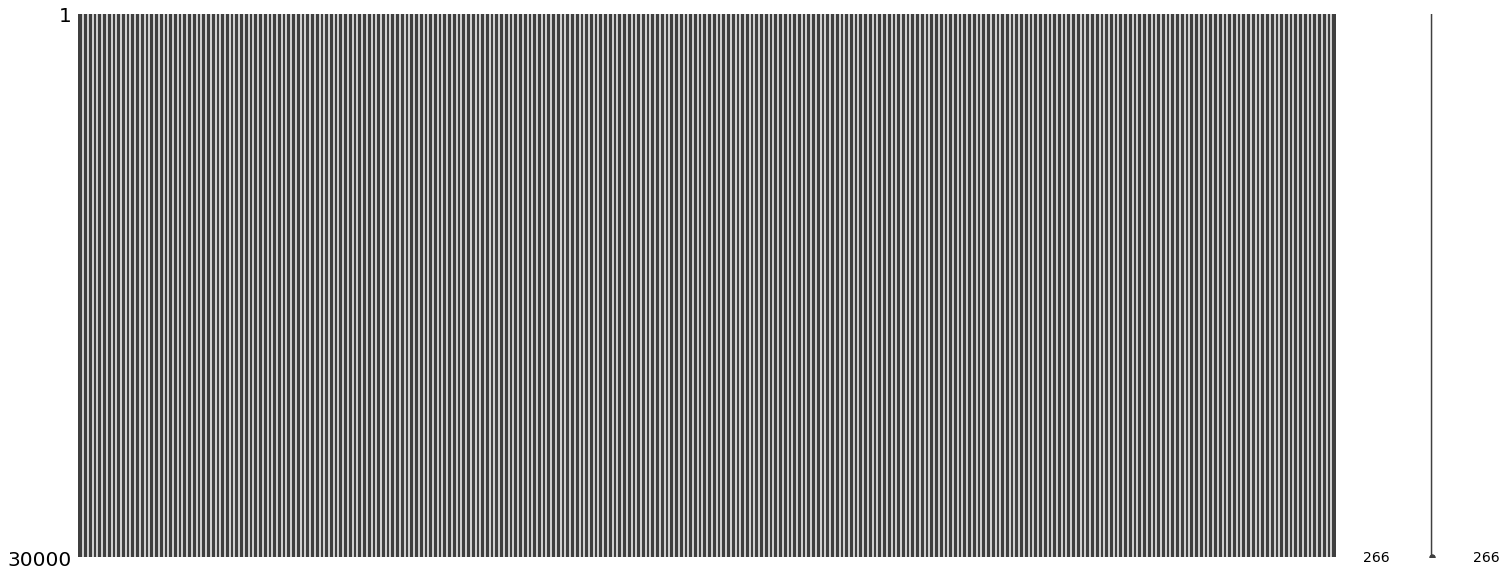

In [12]:
# To see if I am missing any info in my data, I use MissingNo to validate I have all the info in my data
msno.matrix(df)

# In order to assess the playstyles of the different lanes, I am going to use K-Means clustering for each lane

In [50]:
def lane(lane_name):
    players = ['Team1_Player1', 'Team1_Player2', 'Team1_Player3', 'Team1_Player4', 'Team1_Player5',
              'Team2_Player1', 'Team2_Player2', 'Team2_Player3', 'Team2_Player4', 'Team2_Player5']
    
#     df = pd.DataFrame(columns=['Lane', 'Champion', 'Summoner'])
    for player in players:
        rift = df.query("{}_Lane == '{}'".format(player, lane_name))[['{}_Lane'.format(player), 
                                                                      '{}_Champion'.format(player), 
                                                                      '{}_Summoner'.format(player)]]
        rift.rename(columns = {"{}_Lane".format(player): "Lane", 
                              "{}_Champion".format(player): "Champion",
                              "{}_Summoner".format(player): "Summoner"}, inplace = True)
#         df['Lane'] = rift['Lane']
    return rift

In [51]:
"{}_Lane == '{}'".format('Team1_Player1', str("MIDDLE"))

"Team1_Player1_Lane == 'MIDDLE'"

In [52]:
lane('MIDDLE')

,Lane,Champion,Summoner
20,MIDDLE,164,VhGCgKUK1R_3z8VkodbQeYc9K4Ro0iEGEITuPB-Upc0
32,MIDDLE,84,NVcCw3pXDgaG1yXBdn1rHXS7D_-b04u6YVGPspvxrdoVC_E
37,MIDDLE,163,Skwkw8fxads6mpdErP5O24WI6VZTPR2s4FqK-f7cnoCqdLg
40,MIDDLE,13,pABgmovHF4o0fkvV07C0tyAMO4ohie9lgkV3kNymHXscIS...
43,MIDDLE,157,45sR1rhEdMvk3pX6ot1SgCbGqpE1cs44gmDF2aZeGT9Rb_A
47,MIDDLE,163,fLc0YvXZBKJlVuVqvsfEN_fmcGbtx5jIkdqBMCHUaZxEzg
54,MIDDLE,84,nI03A1n4rDZKvprgIGy3ml42U3v12ik5b4r-RI69Au_oLQ
61,MIDDLE,164,VhGCgKUK1R_3z8VkodbQeYc9K4Ro0iEGEITuPB-Upc0
63,MIDDLE,238,HlG3AlNzr8DfB0_nrLSv5uGeCrOQFWN8E4NZUB1nOtlSkl0
88,MIDDLE,42,Qew7WMQbo3feeC9CdZhrfXmqWyuGxmGPDrqVpx_RcZAidw
